In [1282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyter_core.migrate import regex
import plotly.express as px
import statistics
import math

In [1283]:
df = pd.read_csv("/content/cars_ds_final.csv",index_col=0)

In [1284]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1285]:
df.shape

(1276, 140)

In [1286]:
df['Make'].isna().sum()

75

In [1287]:
df['Make'].fillna(df['Model'], inplace=True)

In [1288]:
df.loc[df['Make'].str.contains('Mercedes-Benz', na=False), 'Make'] = 'Mercedes-Benz'
df.loc[df['Make'].str.contains('Rolls-Royce', na=False), 'Make'] = 'Rolls-Royce'
df.loc[df['Make'].str.contains('Go+', na=False), 'Make'] = 'Datsun'
df.loc[df['Make'].str.contains('Maruti Suzuki R', na=False), 'Make'] = 'Maruti Suzuki'
df['Make']=df['Make'].str.replace('Land Rover Rover','Land Rover')

In [1289]:
df.loc[df['Make'].str.contains('Wagon', na=False), 'Make'] = 'Maruti Suzuki'
df['Model']=df['Model'].str.replace('Wagon','Wagon R')
df['Model']=df['Model'].str.replace('Mercedes-Benz ','')
df['Make']=df['Make'].str.replace('Rolls-Royce ','')
df['Variant']=df['Variant'].str.replace('Datsun ','')

In [1290]:
df['Make'].isna().sum()

0

In [1291]:
df['Make'].iloc[250:260]

250             Audi
251             Audi
252    Mercedes-Benz
253    Mercedes-Benz
254    Mercedes-Benz
255    Mercedes-Benz
256    Mercedes-Benz
257    Mercedes-Benz
258    Mercedes-Benz
259            Skoda
Name: Make, dtype: object

In [1292]:
df['Displacement'].isna().sum()

12

In [1293]:
df['Displacement']=df.Displacement.str.strip('cc')

In [1294]:
df['Displacement'].median()


1497.0

In [1295]:
df['Displacement'] = df['Displacement'].replace(np.nan, df.Displacement.median())

In [1296]:
df['Displacement'].isna().sum()

0

In [1297]:
df['Displacement']=df['Displacement'].astype(int)

In [1298]:
df['Cylinders'].isna().sum()

66

In [1299]:
df['Cylinders'].median()

4.0

In [1300]:
df['Cylinders'] = df['Cylinders'].replace(np.nan, df.Cylinders.median())

In [1301]:
df['Cylinders'] = df['Cylinders'].astype(float)

In [1302]:
df['Cylinders'].dtypes

dtype('float64')

In [1303]:
df['Emission_Norm'].isna().sum()

11

In [1304]:
df['Emission_Norm'] = df['Emission_Norm'].replace(np.nan, 'BS VI')

In [1305]:
df['Emission_Norm'] = df['Emission_Norm'].replace('BS 6', 'BS VI')

In [1306]:
df['Emission_Norm'].head(20)

0     BS IV
1     BS IV
2     BS IV
3     BS IV
4     BS IV
5     BS IV
6     BS IV
7     BS IV
8     BS IV
9     BS IV
10    BS IV
11    BS IV
12    BS VI
13    BS VI
14    BS VI
15    BS VI
16    BS VI
17    BS VI
18    BS VI
19    BS VI
Name: Emission_Norm, dtype: object

In [1307]:
df['Emission_Norm'].isna().sum()

0

In [1308]:
df['Fuel_System'].isna().sum()

8

In [1309]:
df['Fuel_System']=df['Fuel_System'].replace(np.nan, 'Injection')

In [1310]:
df['Fuel_System'].isna().sum()

0

In [1311]:
df['Fuel_Tank_Capacity'].isna().sum()

69

In [1312]:
df['Fuel_Tank_Capacity']=df['Fuel_Tank_Capacity'].str.strip('litres')

In [1313]:
df['Fuel_Tank_Capacity'].median()

46.0

In [1314]:
df['Fuel_Tank_Capacity']=df['Fuel_Tank_Capacity'].replace(np.nan, '46')


In [1315]:
df['Fuel_Tank_Capacity'].isna().sum()

0

In [1316]:
df['Fuel_Tank_Capacity']=df['Fuel_Tank_Capacity'].astype(float)

In [1317]:
df['Fuel_Type'].isna().sum()

0

In [1318]:
df['Height'].isna().sum()

1

In [1319]:
df['Height'].mode()

0    1520 mm
Name: Height, dtype: object

In [1320]:
df['Height']=df['Height'].str.strip('mm')

In [1321]:
df['Height']=df['Height'].replace(np.nan, '1520')

In [1322]:
df['Height'].isna().sum()

0

In [1323]:
df['Height'].unique()

array(['1652 ', '1541 ', '1490 ', '1800 ', '1475 ', '1460 ', '1507 ',
       '1560 ', '1535 ', '1595 ', '1643 ', '1730 ', '1510 ', '1530 ',
       '1562 ', '1520 ', '1555 ', '1505 ', '1469 ', '1515 ', '1570 ',
       '1483 ', '1525 ', '1540 ', '1542 ', '1544 ', '1657 ', '1840 ',
       '1845 ', '1.845 ', '1672 ', '1679 ', '1689 ', '1416 ', '1557 ',
       '1432 ', '1200 ', '1608 ', '1425 ', '1415 ', '1441 ', '1427 ',
       '1414 ', '1457 ', '1409 ', '1455 ', '1678 ', '1727 ', '1443 ',
       '1384 ', '1745 ', '1391 ', '1802 ', '1749 ', '1398 ', '1410 ',
       '1281 ', '1850 ', '1880 ', '1700 ', '1520', '1479 ', '1481 ',
       '1740 ', '1494 ', '1411 ', '1938 ', '1969 ', '1485 ', '1353 ',
       '1345 ', '1498 ', '1865 ', '1417 ', '1252 ', '1638 ', '1401 ',
       '1320 ', '1742 ', '1250 ', '1203 ', '1550 ', '1521 ', '1835 ',
       '1598 ', '1212 ', '1549 ', '1655 ', '1523 ', '1885 ', '1537 ',
       '1501 ', '1875 ', '1590 ', '1607 ', '1487 ', '1977 ', '1640 ',
       '1647 ', '169

In [1324]:
df['Height']=df['Height'].replace('1.845 ','1845 ')

In [1325]:
df['Height']=df['Height'].astype(int)

In [1326]:
df['Length'].isna().sum()

0

In [1327]:
df['Length'].unique()

array(['3164 mm', '3429 mm', '3731 mm', '3675 mm', '3545 mm', '3620 mm',
       '3788 mm', '3600 mm', '3695 mm', '3610 mm', '3765 mm', '3746 mm',
       '3700 mm', '3990 mm', '3970 mm', '3884 mm', '3801 mm', '3825 mm',
       '3995 mm', '3985 mm', '3971 mm', '3954 mm', '4369 mm', '3895 mm',
       '3991 mm', '3989 mm', '3955 mm', '4398 mm', '4825 mm', '4850 mm',
       '4486 mm', '4592 mm', '4861 mm', '4456 mm', '4393 mm', '4630 mm',
       '4565 mm', '4388 mm', '3982 mm', '3850 mm', '4425 mm', '4253 mm',
       '4726 mm', '3874 mm', '4691 mm', '4961 mm', '5252 mm', '5067 mm',
       '4421 mm', '4933 mm', '4657 mm', '4600 mm', '4963 mm', '4718 mm',
       '4922 mm', '4784 mm', '4828 mm', '4846 mm', '4703 mm', '4461 mm',
       '4379 mm', '5120 mm', '5146 mm', '4840 mm', '5000 mm', '4649 mm',
       '5219 mm', '5052 mm', '5116 mm', '5246 mm', '5027 mm', '5003 mm',
       '4763 mm', '4817 mm', '5302 mm', '4881 mm', '5262 mm', '4770 mm',
       '5453 mm', '5049 mm', '5199 mm', '5080 mm', 

In [1328]:
df['Length']=df['Length'].replace('4.64 mm','4640 mm').str.strip('mm').astype(int)

In [1329]:
df['Width'].isna().sum()

12

In [1330]:
df['Width'].unique()

array(['1750 mm', '1560 mm', '1579 mm', '1580 mm', '1475 mm', '1490 mm',
       '1636 mm', '1600 mm', '1645 mm', '1677 mm', '1647 mm', '1690 mm',
       '1739 mm', '1570 mm', '1695 mm', '1665 mm', '1660 mm', '1710 mm',
       '1734 mm', '1680 mm', '1682 mm', '1735 mm', '1737 mm', '1704 mm',
       '1705 mm', '1740 mm', '1706 mm', '1745 mm', '1694 mm', '1818 mm',
       '1860 mm', '1960 mm', '1839 mm', '1855 mm', '1864 mm', '1796 mm',
       '1786 mm', '1777 mm', '2120 mm', '1831 mm', '1727 mm', '1863 mm',
       '1801 mm', '1842 mm', '1850 mm', '2091 mm', '1899 mm', '1793 mm',
       '1874 mm', '1881 mm', '2069 mm', '1879 mm', '1843 mm', '2218 mm',
       '2080 mm', '1943 mm', '1954 mm', '1854 mm', '1934 mm', '1982 mm',
       '1885 mm', '1895 mm', nan, '2169 mm', '2142 mm', '1968 mm',
       '2158 mm', '1931 mm', '1945 mm', '1915 mm', '1948 mm', '1920 mm',
       '1937 mm', '1980 mm', '2029 mm', '2181 mm', '2226 mm', '1910 mm',
       '1998 mm', '1865 mm', '1951 mm', '1947 mm', '2208 

In [1331]:
df['Width'].mode()

0    1695 mm
Name: Width, dtype: object

In [1332]:
df['Width']=df['Width'].str.strip('mm')

In [1333]:
df['Width']=df['Width'].replace(np.nan, '1695')

In [1334]:
df['Width'].isna().sum()

0

In [1335]:
df['Width']=df['Width'].replace('1.845 ','1845 ')

In [1336]:
df['Width']=df['Width'].astype(int)

In [1337]:
df['Body_Type'].isna().sum()

6

In [1338]:
df['Body_Type'].mode()

0    SUV
Name: Body_Type, dtype: object

In [1339]:
df['Body_Type']=df['Body_Type'].replace(np.nan, 'SUV')

In [1340]:
df['Body_Type'].isna().sum()

0

In [1341]:
df['Doors'].isna().sum()

4

In [1342]:
df['Doors'].mode()

0    5.0
Name: Doors, dtype: float64

In [1343]:
df['Doors']=df['Doors'].replace(np.nan, '5.0')

In [1344]:
df['Doors'].isna().sum()

0

In [1345]:
df['Doors']=df['Doors'].astype(float)

In [1346]:
df['Gears'].isna().sum()

105

In [1347]:
df['Gears'].mode()

0    5
Name: Gears, dtype: object

In [1348]:
df['Gears']=df['Gears'].replace(np.nan, '5')

In [1349]:
df['Gears'].isna().sum()

0

In [1350]:
df['Gears'].unique()

array(['4', '5', '6', '7', '9', '8', '7 Dual Clutch',
       'Single Speed Reduction Gear'], dtype=object)

In [1351]:
df['Ground_Clearance'].isna().sum()

289

In [1352]:
df['Ground_Clearance'].mode()

0    165 mm
Name: Ground_Clearance, dtype: object

In [1353]:
df['Ground_Clearance']=df['Ground_Clearance'].replace(np.nan,"165 mm")

In [1354]:
df['Ground_Clearance'].isna().sum()

0

In [1355]:
df['Power'].isna().sum()

0

In [1356]:
df['Power'].head()

0    38PS@5500rpm
1    38PS@5500rpm
2    38PS@5500rpm
3    38PS@5500rpm
4    38PS@5500rpm
Name: Power, dtype: object

In [1357]:
df['Torque'].isna().sum()

2

In [1358]:
df['Torque']=df['Torque'].fillna('195Nm@1400-2200rpm')

In [1359]:
df['Torque'].isna().sum()

0

In [1360]:
df['Seating_Capacity'].isna().sum()

6

In [1361]:
df['Seating_Capacity'].median()

5.0

In [1362]:
df['Seating_Capacity']=df['Seating_Capacity'].replace(np.nan,'5')

In [1363]:
df['Seating_Capacity'].isna().sum()

0

In [1364]:
df['Seating_Capacity']=df['Seating_Capacity'].astype(int)

In [1365]:
df['Type'].isna().sum()

1

In [1366]:
df['Type']=df['Type'].replace(np.nan,"Automatic")

In [1367]:
df['Type'].isnull().sum()

0

In [1368]:
df['Boot_Space'].isna().sum()

249

In [1369]:
df['Boot_Space'].head()

0    110 litres
1    110 litres
2    110 litres
3     94 litres
4    110 litres
Name: Boot_Space, dtype: object

In [1370]:
df['Boot_Space'].mode()

0    350 litres
Name: Boot_Space, dtype: object

In [1371]:
df['Boot_Space']=df['Boot_Space'].replace(np.nan,"350 litres")

In [1372]:
df['Boot_Space'].isnull().sum()

0

In [1373]:
df['Number_of_Airbags'].isna().sum()

135

In [1374]:
df['Number_of_Airbags'].median()

2.0

In [1375]:
df['Number_of_Airbags']=df['Number_of_Airbags'].replace(np.nan, '2')

In [1376]:
df['Number_of_Airbags'].isna().sum()

0

In [1377]:
df['Number_of_Airbags']=df['Number_of_Airbags'].astype(int)

In [1378]:
df['Basic_Warranty'].isna().sum()

440

In [1379]:
df['Basic_Warranty'].mode()

0    2 years / Unlimited Kms
Name: Basic_Warranty, dtype: object

In [1380]:
df['Basic_Warranty']=df['Basic_Warranty'].replace(np.nan, "2 years / Unlimited Kms")

In [1381]:
df['Basic_Warranty'].isna().sum()

0

In [1382]:
df['Make'].isna().sum()

0

In [1383]:
df['Make'].iloc[309:314]

309    Mercedes-Benz
310    Mercedes-Benz
311    Mercedes-Benz
312           Toyota
313            Lexus
Name: Make, dtype: object

In [1384]:
df['Make'].isna().sum()

0

In [1385]:
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].replace(r'\D', '',regex=True)
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].astype(int)

In [1386]:
df['Ex-Showroom_Price'].head()

0    292667
1    236447
2    296661
3    334768
4    272223
Name: Ex-Showroom_Price, dtype: int64

In [1387]:
df['Drivetrain'].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD', nan], dtype=object)

In [1388]:
df['Drivetrain']=df['Drivetrain'].replace(np.nan,'FWD (Front Wheel Drive)')

In [1389]:
df['Drivetrain'].iloc[840:850]

840      AWD (All Wheel Drive)
841      AWD (All Wheel Drive)
842      AWD (All Wheel Drive)
843    FWD (Front Wheel Drive)
844    FWD (Front Wheel Drive)
845    FWD (Front Wheel Drive)
846      AWD (All Wheel Drive)
847      AWD (All Wheel Drive)
848                        4WD
849                        4WD
Name: Drivetrain, dtype: object

**1. HEATMAP**

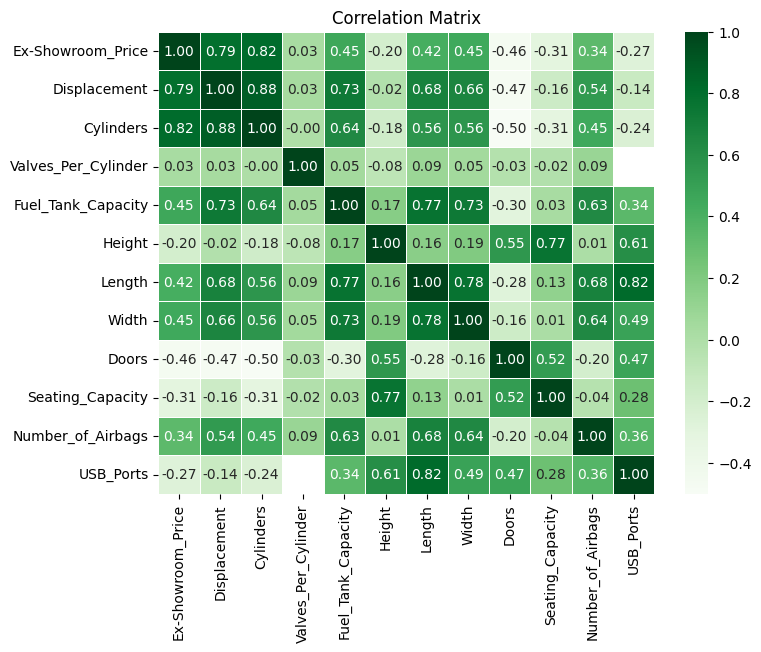

In [1390]:
num_column = df.select_dtypes(include='number')
matrix = num_column.corr()

plt.figure(figsize =(8,6))
sns.heatmap(matrix, annot = True, cmap = 'Greens', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

**2. HISTOGRAM**

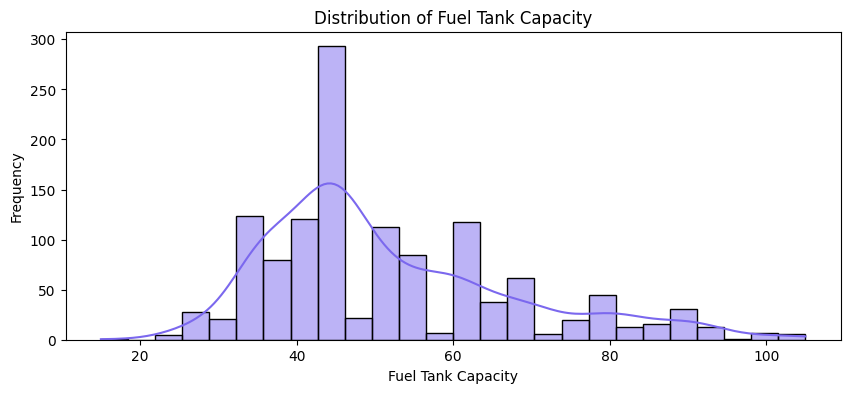

In [1391]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Fuel_Tank_Capacity'], kde=True, color = 'mediumslateblue')

# Adding labels and title
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Tank Capacity')

# Display the plot
plt.show()

**3. COUNTPLOT**

<ipython-input-1392-ddd148c14811>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




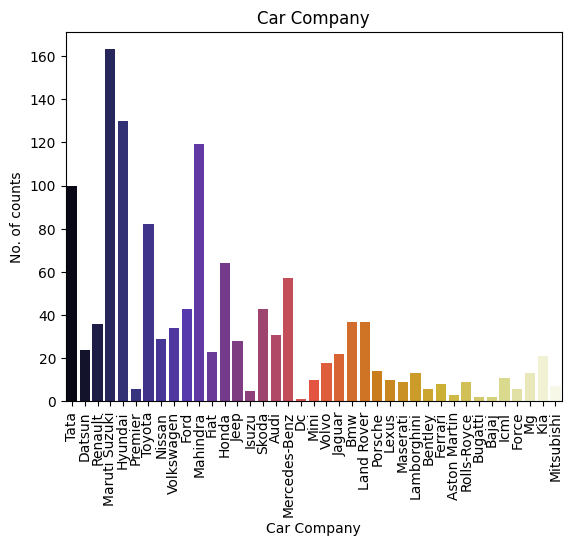

In [1392]:
sns.countplot(data=df,x="Make",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Car Company",fontsize=10,color="black")
plt.ylabel("No. of counts",fontsize=10,color="black")
plt.title("Car Company",color="black")
plt.show()

**4. PIE CHART**

Text(0.5, 1.0, 'Top 5 Car Model')

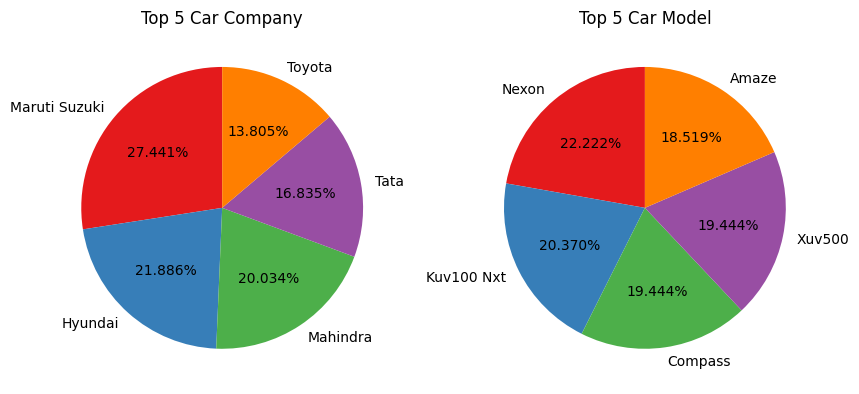

In [1393]:
count = df['Make'].value_counts()
top_company = count.head(5)

model_count = df['Model'].value_counts()
top_model = model_count.head(5)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].pie(top_company , labels = top_company.index, autopct = '%1.3f%%', colors= sns.color_palette('Set1'), startangle=90)
axes[0].set_title('Top 5 Car Company')

axes[1].pie(top_model , labels = top_model.index, autopct = '%1.3f%%',colors= sns.color_palette('Set1'), startangle=90)
axes[1].set_title('Top 5 Car Model')

**5. COUNT PLOT**

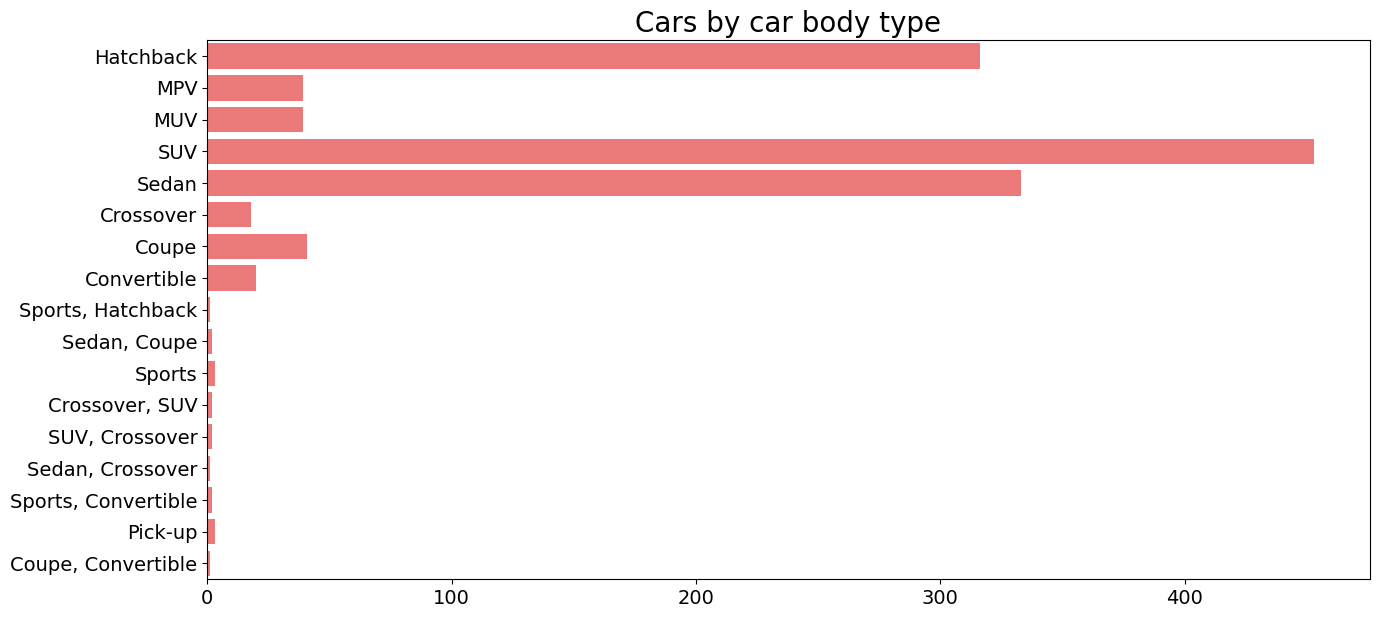

In [1394]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='red')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

**6. SCATTER PLOT**

In [1395]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=1000,height=750)
fig.update_layout(showlegend=True)
fig.show();

**7. VIOLIN PLOT**

<ipython-input-1396-c4d9439043bc>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




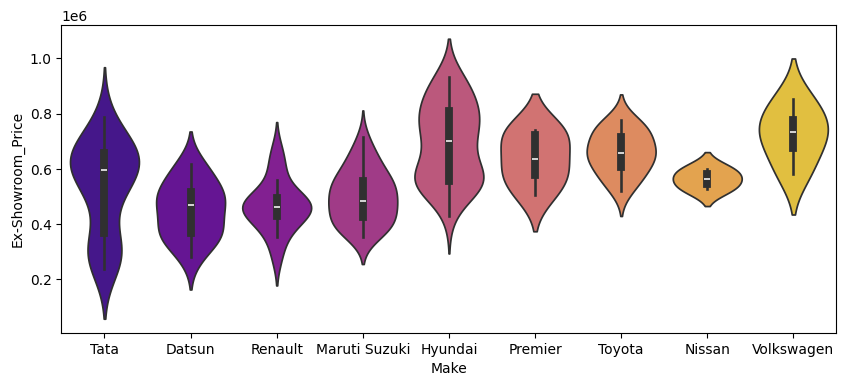

In [1396]:
plt.figure(figsize=(10,4))
sns.violinplot(x = 'Make', y = 'Ex-Showroom_Price', data = df.head(150), palette = 'plasma')
plt.show()

**8.JOINT PLOT**

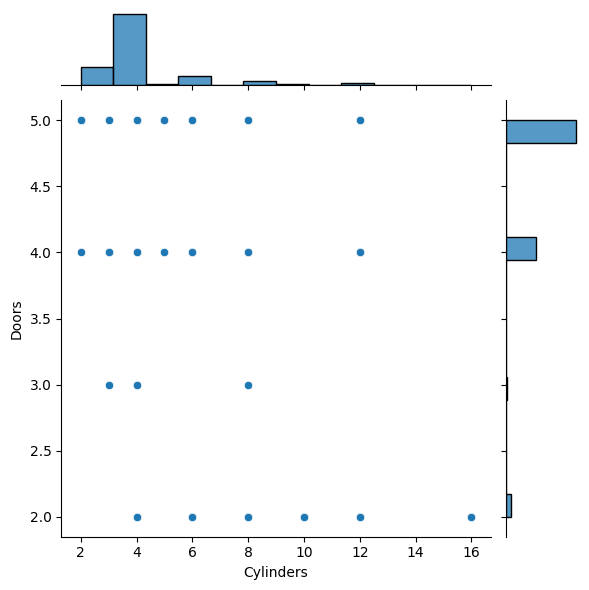

In [1397]:
penguins = sns.load_dataset("penguins")
sns.jointplot(x="Cylinders", y="Doors",data = df)

**9. BOX PLOT**

<Axes: xlabel='Number_of_Airbags', ylabel='Make'>

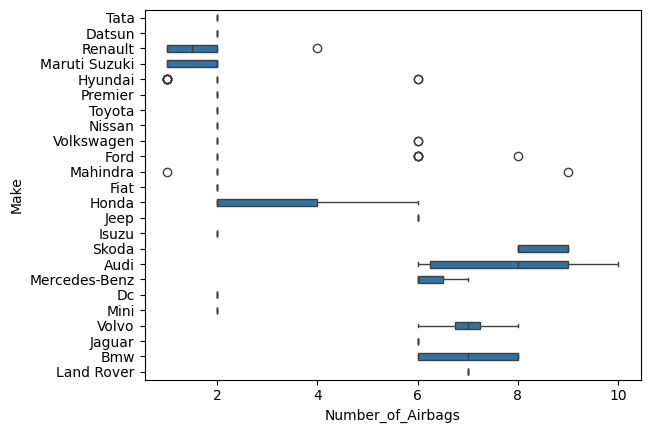

In [1398]:
sns.boxplot(data=df.head(300), x="Number_of_Airbags", y="Make", gap=.1,width=.5)

**10. PAIR PLOT**

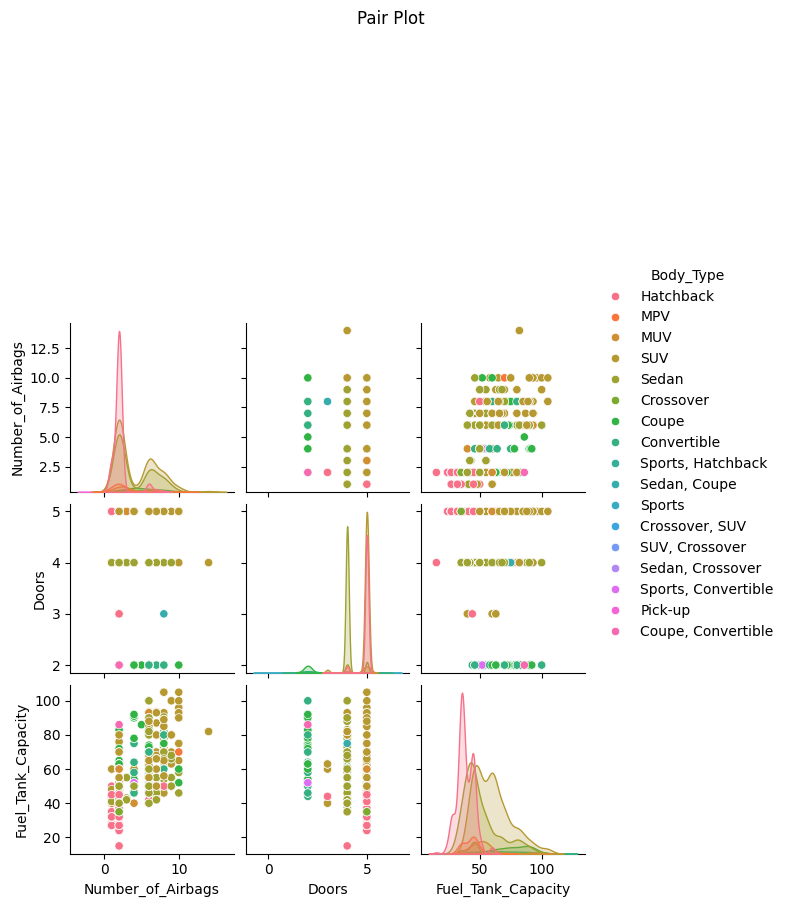

In [1399]:
sns.pairplot(df, hue = 'Body_Type', vars = ['Number_of_Airbags','Doors','Fuel_Tank_Capacity'], height = 2)
plt.suptitle('Pair Plot', y = 1.5)
plt.show()